# Clean and Analyze Employee Exit Surveys

We'll be working with data from exit surveys from two Australian organizations: the Department of Education, training, and Employment (DETE) and the Technical and Further Education institute (TAFE).  The DETE dataset can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and the TAFE dataset can be found [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey).

We are going to focus on cleaning and analyzing the combined datasets in an effort to answer the following two questions:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Let's bring in our two datasets and take a quick look at them:

In [1]:
import numpy as np
import pandas as pd

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
dete_survey.info()
dete_survey.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994,1997,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,D,D,NaN,Female,41-45,NaN,NaN,NaN,NaN,NaN
6,7,Age Retirement,05/2012,1972,2007,Teacher,Secondary,Darling Downs South West,NaN,Permanent Part-time,...,D,D,SD,Female,56-60,NaN,NaN,NaN,NaN,NaN
7,8,Age Retirement,05/2012,1988,1990,Teacher Aide,NaN,North Coast,NaN,Permanent Part-time,...,SA,NaN,SA,Female,61 or older,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009,2009,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,A,D,N,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997,2008,Teacher Aide,NaN,Not Stated,NaN,Permanent Part-time,...,SD,SD,SD,Female,46-50,NaN,NaN,NaN,NaN,NaN


In [3]:
tafe_survey.info()
tafe_survey.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,NaN,NaN,NaN,NaN,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,Yes,Yes,Yes,Yes,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,No,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,Female,36 40,Temporary Full-time,Tutor,3-4,3-4
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,Yes,Yes,Yes,Yes,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2


In [4]:
dete_survey['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [5]:
tafe_survey['Reason for ceasing employment'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

In [6]:
dete_survey['DETE Start Date'].value_counts()

Not Stated    73
2011          40
2007          34
2008          31
2012          27
2010          27
2009          24
2006          23
2013          21
1975          21
1970          21
2005          20
1990          20
1996          19
1999          19
1992          18
1991          18
2004          18
2000          18
1989          17
2002          15
1978          15
1976          15
1988          15
2003          15
1995          14
1980          14
1997          14
1998          14
1979          14
1974          14
1993          13
1972          12
1986          12
1977          11
1994          10
1969          10
2001          10
1971          10
1984          10
1981           9
1983           9
1985           8
1973           8
1987           7
1982           4
1963           4
1968           3
1967           2
1965           1
1966           1
Name: DETE Start Date, dtype: int64

In [7]:
dete_survey['Age'].value_counts()

61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
20 or younger      1
Name: Age, dtype: int64

In [8]:
tafe_survey['CurrentAge. Current Age'].value_counts()

56 or older      162
51-55             82
41  45            80
46  50            59
31  35            52
36  40            51
26  30            50
21  25            44
20 or younger     16
Name: CurrentAge. Current Age, dtype: int64

Initially, we can make a few observations:
- The `dete_survey` data contains `Not Stated` values that indicate values are missing, but they aren't represented as `NaN`.
- Both the `dete_survey` and `tafe_survey` dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names/labels are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

## Identifying Missing Values and Dropping Unnecessary Columns

To start, we'll handle the first two issues.  We'll re-import/read our `dete_survey` data, replacing `Not Stated` values with `NaN` in the process, and then we'll drop columns we know we don't need for our analysis.

In [9]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

Now, we've adjusted the `dete_survey` data to have consistent null values (making our analysis efforts cleaner going forward) and trimmed our datasets to only include columns that will/may be useful in our analysis (data covering core employee information, dates/tenures, contributing factors to termination/resignation, etc).

## Cleaning Column Names

Next, let's turn our attention to the column names.  As stated earlier, each of the two dataframes contains many of the same columns, but the column names are different.  For example, employee age is contained in the `Age` column in the `dete_survey` data, and is contained in the `CurrentAge. Current Age` column in the `tafe_survey` data.

Because we eventually want to combine our datasets, we'll have to standardize column names.

In [10]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace('\s+', '_').str.strip().str.lower()
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [11]:
# create dictionary of changes to make to TAFE data column names
tafe_changes = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

# use above dictionary to rename columns
tafe_survey_updated.rename(tafe_changes, axis=1, inplace=True)

tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In our `dete_survey_updated` dataframe, we edited our existing column names (for the purpose of simplifying/using more standard Python syntax) by replacing white spaces with underscores, removing extra white spaces, and making all characters lowercase.

In our `tafe_survey_updated` dataframe, we completely renamed some of our columns names to make them consistent with their equivalent columns in the `dete_survey_updated` dataframe.  There are still some columns we didn't modify/that are different; we'll handle those later.

## Filtering the Data

Next, let's remove more of the data we don't need.

As a reminder, our end goal is to answer the following question:
- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

If we look at the unique values in the `separationtype` columns in each dataframe, we see that each contains a couple of different separation types.  We're going to focus on respondents who _resigned_, so their separation type contains the string `Resignation`.  Note that `dete_survey_updated` contains multiple separation types with the string `Resignation`.

In [12]:
print(dete_survey_updated['separationtype'].value_counts())
tafe_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [13]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

print(dete_resignations['separationtype'].value_counts())
tafe_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64


Resignation    340
Name: separationtype, dtype: int64

Now we have created two pared-down dataframes, `dete_resignations` and `tafe_resignations`, that only contain entries in which the separation type was a resignation (verified above); so we can focus our analysis on answering questions about former employees who resigned, specifically.

## Verifying the Data

Before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any inconsistencies.  We'll jump in by focusing on verifying that the years in the `cease_date` and `dete_start_date` columns make sense.

In [14]:
dete_resignations['cease_date'].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2006      1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

In [15]:
years = dete_resignations['cease_date'].str.extract(r'([1-2][0-9]{3})').astype(float)
dete_resignations['cease_date'] = years

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [16]:
dete_resignations['cease_date'].value_counts(dropna=False)

 2013.0    146
 2012.0    129
 2014.0     22
NaN         11
 2010.0      2
 2006.0      1
Name: cease_date, dtype: int64

In [17]:
dete_resignations['dete_start_date'].value_counts(dropna=False)

NaN        28
 2011.0    24
 2008.0    22
 2007.0    21
 2012.0    21
 2010.0    17
 2005.0    15
 2004.0    14
 2009.0    13
 2006.0    13
 2013.0    10
 2000.0     9
 1999.0     8
 1998.0     6
 2002.0     6
 1994.0     6
 1996.0     6
 1992.0     6
 2003.0     6
 1980.0     5
 1990.0     5
 1993.0     5
 1997.0     5
 1989.0     4
 1995.0     4
 1988.0     4
 1991.0     4
 2001.0     3
 1986.0     3
 1985.0     3
 1976.0     2
 1983.0     2
 1974.0     2
 1963.0     1
 1972.0     1
 1984.0     1
 1975.0     1
 1973.0     1
 1987.0     1
 1982.0     1
 1971.0     1
 1977.0     1
Name: dete_start_date, dtype: int64

In [18]:
tafe_resignations['cease_date'].value_counts(dropna=False)

 2011.0    116
 2012.0     94
 2010.0     68
 2013.0     55
NaN          5
 2009.0      2
Name: cease_date, dtype: int64

As can be seen above, we've now verified that the `cease_date` columns from both dataframes and the `dete_start_date` column from the DETE dataframe are all consistent float values representing a year.  We do see, however, that each contains a few missing (`NaN`) values.  We'll remove those entries, since they won't be helpful in our analysis.

In [19]:
tafe_resignations = tafe_resignations[tafe_resignations['cease_date'].notnull()]
print(tafe_resignations['cease_date'].value_counts().sort_index(ascending=False))
print('\n')

dete_resignations = dete_resignations[dete_resignations['cease_date'].notnull()]
print(dete_resignations['cease_date'].value_counts().sort_index(ascending=False))
print('\n')

dete_resignations = dete_resignations[dete_resignations['dete_start_date'].notnull()]
print(dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False))

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64


2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64


2013.0    10
2012.0    20
2011.0    23
2010.0    17
2009.0    13
2008.0    22
2007.0    20
2006.0    12
2005.0    14
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     8
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     3
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     4
1989.0     4
1988.0     4
1986.0     3
1985.0     3
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64


Now we've eliminated entries containing missing/null values for the year columns in our dataframes. 

## Creating a New Column

In the HR field, the length of time an employee spent in a workplace is referred to as their years of _service_.  The `tafe_resignations` dataframe already contains a "service" column, which was renamed to `institute_service`.  In order to be able to analyze both survey datasets together, we'll have to create a corresponding column in `dete_resignations`.

In [20]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].value_counts().sort_index(ascending=False)

49.0     1
42.0     1
41.0     1
39.0     3
38.0     1
36.0     2
35.0     1
34.0     1
33.0     1
32.0     3
31.0     1
30.0     2
29.0     1
28.0     2
27.0     1
26.0     2
25.0     2
24.0     4
23.0     4
22.0     6
21.0     3
20.0     7
19.0     3
18.0     5
17.0     6
16.0     5
15.0     7
14.0     6
13.0     8
12.0     6
11.0     4
10.0     6
9.0     14
8.0      8
7.0     13
6.0     17
5.0     23
4.0     16
3.0     20
2.0     14
1.0     22
0.0     20
Name: institute_service, dtype: int64

To create the `institute_service` column in `dete_resignations`, we simply established the difference (subtracted) between `cease_date` and `dete_start_date`, resulting in tenure values.  We now have the ability to analyze survey respondents based on length of employment.

## Identifying Dissatisfied Employees

Next, we'll identify any employees who resigned because they were dissatisfied.

For the `tafe_resignations` data, we'll reference the following columns for contributing factors:
- `Contributing Factors. Dissatisfaction`
- `Contributing Factors. Job Dissatisfaction`
- `Contributing Factors. Travel`

For the `dete_resignations` data, we'll reference the following columns for contributing factors:
- `job_dissatisfaction`
- `dissatisfaction_with_the_department`
- `physical_work_environment`
- `lack_of_recognition`
- `lack_of_job_security`
- `work_location`
- `employment_conditions`
- `work_life_balance`
- `workload`

In [21]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print('\n')
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())
print('\n')
print(tafe_resignations['Contributing Factors. Travel'].value_counts())

-                                         275
Contributing Factors. Dissatisfaction      53
Name: Contributing Factors. Dissatisfaction, dtype: int64


-                      266
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


-         312
Travel     16
Name: Contributing Factors. Travel, dtype: int64


We see a "-" when the factor was not marked on the survey, and the name of the factor when it was.  We'll adjust these columns to True/False/NaN values for the sake of clean analysis.

In [22]:
def update_vals(value):
    if value == 'NaN':
        return np.nan
    elif value == '-':
        return False
    else:
        return True

# use update_vals function to convert values in approprate tafe_resignations columns to True/False/NaN
tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Travel']] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Travel']].applymap(update_vals)

print(tafe_resignations['Contributing Factors. Dissatisfaction'].head(5))


3    False
4    False
5    False
6    False
7    False
Name: Contributing Factors. Dissatisfaction, dtype: bool


We'll also create an additional `dissatisfied` column to represent an aggregate value of whether _any one_ of the contributing factors was marked by a resignee.

In [23]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Travel']].any(axis=1, skipna=False)

dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']].any(axis=1, skipna=False)

# Creating copies of our "newly updated" datasets to avoid Python warnings going forward
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()

We've now pared down our data (still two separate datasets) to include just the contributing factors to resignation that were related to some kind of dissatisfaction because that's the focus of our analysis.  We also converted the values in these columns to True/False/NaN values to make them easier to work with going forward.  Finally, weadded a column to represent whether _any_ dissatisfaction-related factors was marked as true in order to simplify the process of making a general observation about whether any kind of dissatisfaction was involved when it comes to former employees who resigned.

## Combining the Data

We're now ready to combine our datasets.

In [24]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

combined = pd.concat([dete_resignations_up, tafe_resignations_up])

print(combined.columns, combined.shape)

Index(['Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Maternity/Family', 'Contributing Factors. NONE',
       'Contributing Factors. Other', 'Contributing Factors. Study',
       'Contributing Factors. Travel', 'Institute', 'WorkArea', 'aboriginal',
       'age', 'business_unit', 'career_move_to_private_sector',
       'career_move_to_public_sector', 'cease_date', 'classification',
       'dete_start_date', 'disability', 'dissatisfaction_with_the_department',
       'dissatisfied', 'employment_conditions', 'employment_status', 'gender',
       'id', 'ill_health', 'institute', 'institute_service',
       'interpersonal_conflicts', 'jo

In [25]:
combined_updated = combined.dropna(axis=1, thresh=500)
print(combined_updated.head(5))

      age  cease_date  dissatisfied    employment_status  gender    id  \
3   36-40      2012.0         False  Permanent Full-time  Female   4.0   
5   41-45      2012.0          True  Permanent Full-time  Female   6.0   
8   31-35      2012.0         False  Permanent Full-time  Female   9.0   
9   46-50      2012.0          True  Permanent Part-time  Female  10.0   
11  31-35      2012.0         False  Permanent Full-time    Male  12.0   

   institute institute_service          position  \
3       DETE                 7           Teacher   
5       DETE                18  Guidance Officer   
8       DETE                 3           Teacher   
9       DETE                15      Teacher Aide   
11      DETE                 3           Teacher   

                          separationtype  
3              Resignation-Other reasons  
5              Resignation-Other reasons  
8              Resignation-Other reasons  
9             Resignation-Other employer  
11  Resignation-Move overse

Above, we first created an `institute` column that allows us, once our data is combined, to indicate which survey an entry came from.  We then combined our two survey datasets into one (in order to work with all of our data together), and then dropped any columns entirely which contained fewer than 500 non-null values (in order to further clean up our data - we won't need these columns to complete our analysis).

## Cleaning the Service Column

Now that we've combined our dataframes, we'll move forward to cleaning up the `institute_service` column; it currently contains values in multiple different forms:

In [26]:
print(combined_updated['institute_service'].value_counts(dropna=False).sort_values(ascending=False))

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   47
5-6                   33
11-20                 24
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
14.0                   6
10.0                   6
12.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
21.0                   3
19.0                   3
32.0                   3
39.0                   3
26.0                   2
36.0                   2
28.0                   2
25.0                   2
30.0                   2


To analyze the data, we'll convert these numbers into categories.  We'll base our analysis on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee needs according to career stage, rather than age, is more effective.

We'll use these slightly modified definitions:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [27]:
service = combined_updated['institute_service'].astype('str', copy=False)
service = service.str.replace('More than ', '').str.replace('Less than ', '').str.replace(' years?', '').str.split('-').str[0]

combined_updated['institute_service'] = service.astype('float')
combined_updated['institute_service'].value_counts(dropna=False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


 1.0     159
 3.0      83
 5.0      56
NaN       47
 7.0      34
 11.0     28
 0.0      20
 6.0      17
 20.0     17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 12.0      6
 17.0      6
 14.0      6
 10.0      6
 16.0      5
 18.0      5
 23.0      4
 24.0      4
 19.0      3
 32.0      3
 39.0      3
 21.0      3
 25.0      2
 30.0      2
 26.0      2
 36.0      2
 28.0      2
 35.0      1
 38.0      1
 27.0      1
 31.0      1
 33.0      1
 29.0      1
 49.0      1
 34.0      1
 41.0      1
 42.0      1
Name: institute_service, dtype: int64

In [31]:
def career_stage(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif val < 7:
        return 'Experienced'
    elif val < 11:
        return 'Established'
    elif val:
        return 'Veteran'

combined_updated['service_cat'] = combined_updated['institute_service'].apply(career_stage)

combined_updated['service_cat'].value_counts(dropna=False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


New            193
Experienced    172
Veteran        134
Established     62
NaN             47
Name: service_cat, dtype: int64

Above, we first cleaned up the values in the `institute_service` column to be consistent by converting all to strings, removing all but the actual number values from those strings (including cutting ranges, such as `1-2`, down to a single number), and converting all back to numeric values.  That then allowed us to use our function `career_stage` to create a new series of values (`service_cat`) representative of "career stages" based on years of service.  We left missing values as null values.

Now, we'll do our first piece of analysis by looking at the percentage of "dissatisfied" survey respondents by career stage:

In [32]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    363
True     245
Name: dissatisfied, dtype: int64

In [35]:
pct_dissatisfied = pd.pivot_table(combined_updated, values='dissatisfied', index='service_cat')
pct_dissatisfied

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.348837
New,0.331606
Veteran,0.507463


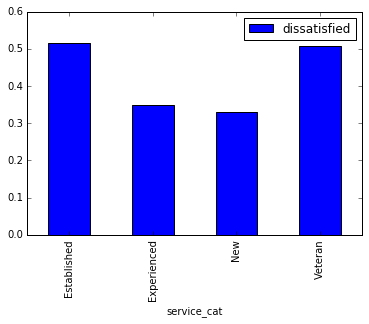

In [36]:
%matplotlib inline
pct_dissatisfied.plot(kind='bar')

## Conclusions

Looking at our table and bar chart, we notice that the two career stage segments that had the greatest percentage of survey respondents deemed "dissatisfied" were the `Veteran` and `Established` segments (both of whom were above 50% marked as dissatisfied).  The two less-experienced categories, `Experienced` and `New`, both saw a significantly lesser percentage of dissatisfied survey respondents (33-35% for both).

This data suggests that more tenured employees (more specifically, those who have been employed for 7 years or more, according to our data) are more likely to leave because of some type of dissatisfiction than those with less tenure.